In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
def calculate_z(x, y, smearing=False):
    
    z = 80*np.exp(-(x-75)**2/30**2) + 0.3 * y + 0.005*y*y
    if smearing:
        sig_z = 0.1 + (x + y) / 1000 # Up to 0.3
        z = z + np.random.normal(z, sig_z * z)

    return z

# Inspecting calculate_z by plotting x and y projections

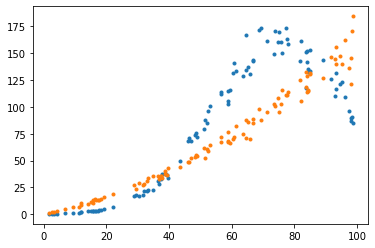

In [3]:
#  z function
data_x = np.random.rand(100) * 100
data_y = np.zeros(100)
data_z = calculate_z(data_x, data_y, smearing=True)

plt.plot(
    data_x,
    calculate_z(data_x, data_y, smearing=True),
    linestyle='none',
    marker='o',
    markersize=3
)
plt.plot(
    data_x,
    calculate_z(data_y, data_x, smearing=True),
    linestyle='none',
    marker='o',
    markersize=3
)

# Creating a large dataset

In [4]:
def create_dataset(size):
    data_x = np.random.rand(size) * 100
    data_y = np.random.rand(size) * 100

    data_z = calculate_z(data_x, data_y)

    df = pd.DataFrame({'x': data_x, 'y': data_y, 'z': data_z})
    return df 

In [5]:
# Creating dataset for plotting
data = create_dataset(200)
data

,x,y,z
0,74.388234,56.622355,112.983902
1,89.774545,71.011592,109.287216
2,82.268961,80.584325,132.082982
3,69.632853,98.713440,155.815735
4,50.541919,82.280763,99.690551
...,...,...,...
195,25.916777,65.006868,46.133896
196,41.953598,44.858080,47.293347
197,53.280610,97.236065,123.809915
198,41.459528,89.370062,89.667378


### Plotting data

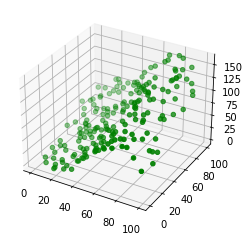

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data['x'], data['y'], data['z'], c='g')